#Install Kaggle

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download rmisra/news-headlines-dataset-for-sarcasm-detection

news-headlines-dataset-for-sarcasm-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


#Download dataset train and validation

In [ ]:
!unzip /content/news-headlines-dataset-for-sarcasm-detection.zip

Archive:  /content/news-headlines-dataset-for-sarcasm-detection.zip
replace Sarcasm_Headlines_Dataset.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Sarcasm_Headlines_Dataset.json  
replace Sarcasm_Headlines_Dataset_v2.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Sarcasm_Headlines_Dataset_v2.json  


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay, classification_report

In [ ]:
df1 = pd.read_json("/content/Sarcasm_Headlines_Dataset.json", lines=True)
df2 = pd.read_json("/content/Sarcasm_Headlines_Dataset_v2.json", lines=True)

#Show dataset

In [ ]:
df1.head(n=10)

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
5,https://www.huffingtonpost.com/entry/advancing...,advancing the world's women,0
6,https://www.huffingtonpost.com/entry/how-meat-...,the fascinating case for eating lab-grown meat,0
7,https://www.huffingtonpost.com/entry/boxed-col...,"this ceo will send your kids to school, if you...",0
8,https://politics.theonion.com/top-snake-handle...,top snake handler leaves sinking huckabee camp...,1
9,https://www.huffingtonpost.com/entry/fridays-m...,friday's morning email: inside trump's presser...,0


In [ ]:
df2.head(n=10)

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
5,0,my white inheritance,https://www.huffingtonpost.com/entry/my-white-...
6,0,5 ways to file your taxes with less stress,https://www.huffingtonpost.com/entry/5-ways-to...
7,1,richard branson's global-warming donation near...,https://www.theonion.com/richard-bransons-glob...
8,1,shadow government getting too large to meet in...,https://politics.theonion.com/shadow-governmen...
9,0,lots of parents know this scenario,https://www.huffingtonpost.comhttp://pubx.co/6...


In [ ]:
df1.isna().sum()

article_link    0
headline        0
is_sarcastic    0
dtype: int64

In [ ]:
df2.isna().sum()

is_sarcastic    0
headline        0
article_link    0
dtype: int64

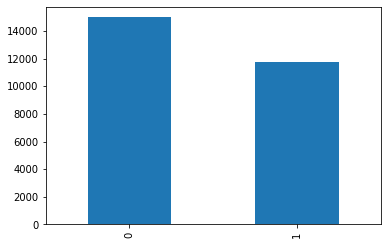

In [ ]:
df1.iloc[:,2].value_counts().plot(kind='bar')

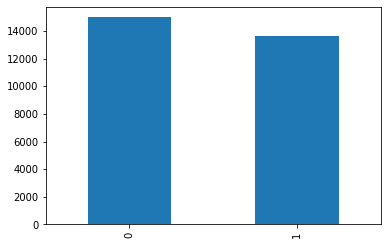

In [ ]:
df2.iloc[:,0].value_counts().plot(kind='bar')

#Train test split

In [ ]:
X1_train, X1_test, Y1_train, Y1_test=train_test_split(df1['headline'], df1['is_sarcastic'], random_state=100)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(df2['headline'], df2['is_sarcastic'], random_state=100)

In [ ]:
X_train=pd.concat([X1_train, X2_train], ignore_index=True)
X_test=pd.concat([X1_test,X2_test], ignore_index=True)
Y_train=pd.concat([Y1_train,Y2_train], ignore_index=True)
Y_test=pd.concat([Y1_test, Y2_test], ignore_index=True)

In [ ]:
type(X_test[1])

str

#Vectorizer

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,3))
X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

In [ ]:
type(X_test[1])

scipy.sparse.csr.csr_matrix

# Train model

In [ ]:
logreg = LogisticRegression(C=1000.0, solver='liblinear')
logreg.fit(X_train, Y_train)
Y_pred=logreg.predict(X_test)

#Confusion matrix

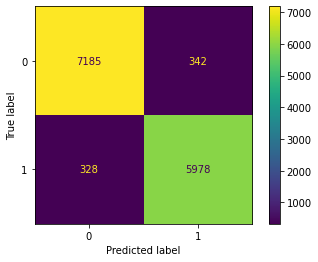

In [ ]:
cm=confusion_matrix(Y_test, Y_pred)
cm_display=ConfusionMatrixDisplay(cm, display_labels=[0, 1]).plot(values_format="d")

In [ ]:
print(classification_report(Y_test, Y_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      7527
           1       0.95      0.95      0.95      6306

    accuracy                           0.95     13833
   macro avg       0.95      0.95      0.95     13833
weighted avg       0.95      0.95      0.95     13833



#Dataset test (collect by group)

In [ ]:
df3 = pd.read_json('/content/dailynews.json', lines=True)

In [ ]:
df3.head()

,is_sarcastic,headline
0,0,la covid risk rises
1,0,rams in woodland hills
2,0,lakers coaching search
3,0,what is monkeypox?
4,0,supervisors race


In [ ]:
df3.isna().sum()

is_sarcastic    0
headline        0
dtype: int64

In [ ]:
df4 = pd.read_json('/content/babylonbee.json', lines=True)

In [ ]:
df4.head()

,is_sarcastic,headline
0,1,we can guess what denomination you are by how ...
1,1,does your wife secretly have a crush on chip g...
2,1,besties! aoc and new fiancé go on double date ...
3,1,we at the babylon bee would like to announce w...
4,1,4d space chess: elon musk switches back to dem...


In [ ]:
df4.isna().sum()

is_sarcastic    0
headline        0
dtype: int64

In [ ]:
my_X_test = pd.concat([df3['headline'], df4['headline']], ignore_index=True)
my_y_test = pd.concat([df3['is_sarcastic'], df4['is_sarcastic']], ignore_index=True)

#Vectorizer

In [ ]:
my_X_test = vectorizer.transform(my_X_test)

In [ ]:
type(my_X_test)

scipy.sparse.csr.csr_matrix

In [ ]:
my_y_pred = logreg.predict(my_X_test)

#Predict

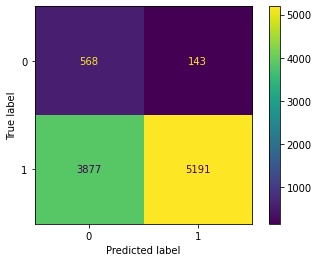

In [ ]:
cm=confusion_matrix(my_y_test, my_y_pred)
cm_display=ConfusionMatrixDisplay(cm, display_labels=[0, 1]).plot(values_format="d")

In [ ]:
print(classification_report(my_y_test, my_y_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.13      0.80      0.22       711
           1       0.97      0.57      0.72      9068

    accuracy                           0.59      9779
   macro avg       0.55      0.69      0.47      9779
weighted avg       0.91      0.59      0.68      9779



#Show 1 headline in test set 

In [ ]:
s = df4['headline'][1]

#Before Vectorizer

In [ ]:
s

'does your wife secretly have a crush on chip gaines? signs to watch out for'

#After Vectorizer

In [ ]:
s = vectorizer.transform([s])

In [ ]:
print(s)

  (0, 277989)	0.28907807017410314
  (0, 274199)	0.2519742305989541
  (0, 229748)	0.3173839904040663
  (0, 223180)	0.36117132399054275
  (0, 99315)	0.4602976050311862
  (0, 72502)	0.28793569648632056
  (0, 59596)	0.39622849281950057
  (0, 44752)	0.4122956036511544


In [ ]:
ss = vectorizer.inverse_transform(s)

In [ ]:
ss

[array(['wife', 'watch', 'signs', 'secretly', 'gaines', 'does', 'crush',
        'chip'], dtype='<U45')]

#Predict 1 headline

In [ ]:
p = logreg.predict(s)

In [ ]:
p

array([0])

#Stopword training

In [ ]:
vectorizer.get_stop_words()

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'